In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib as mpl
import matplotlib.cm as cm
import cPickle as pickle
import helpers
reload(helpers)

<module 'helpers' from 'helpers.py'>

# Figure directories

In [2]:
local_dir = 'paper_figures/'
paper_dir = '/home/tmcgrath/Dropbox/Apps/ShareLaTeX/CLAMS to PLoS CB/figures/'
data_dir = 'new_all_data/'

# Import PyMC3 traces

In [3]:
#trace = pickle.load(open("PYY_Lep_8hr_trace.p", "rb"))
#subj_data = pickle.load(open("PYY_Lep_8hr_subj.p", "rb"))

#trace = pickle.load(open("all_PYY_8hr_trace.p", "rb"))
#subj_data = pickle.load(open("all_PYY_8hr_subj.p", "rb"))

trace = pickle.load(open("new_all_data3_trace.p", "rb"))
subj_data = pickle.load(open("new_all_data3_subj.p", "rb"))

# Create colourmappers and marker styles

In [4]:
## Create day/night line and marker style
period_ms = {'L':'o', 'D':'^'}
period_ls = {'L':'-', 'D':'--'}

In [6]:
print trace['theta1'].shape

(600, 6823)


# Group indexing

In [10]:
reload(helpers)

## Index mask
rat_idx = np.unique(trace['theta1'][0,:], return_index=True)[1]
rat_idx = sorted(rat_idx)

## Subject data
subj_labels = []

for i in subj_data:
    subj_labels.append(i[1].split('_'))
    
subj_labels = np.array(subj_labels)

## Amount colourmapper
amts_save = []
for i, idx in enumerate(rat_idx):
    ## Formatting stuff
    data = subj_labels[i]    
    path = data_dir + '_'.join(data[0:4])
    filename = '_'.join(data)
    amt = helpers.rate_from_file(path, filename)
    amts_save.append(amt)
    
amt_norm = mpl.colors.Normalize(vmin = min(amts_save),
                                vmax = max(amts_save))

cmap = cm.plasma

amt_col = cm.ScalarMappable(norm=amt_norm, cmap=cmap)


# Figure 3a - individual variability in $\theta_{1}$, $\theta_{2}$ is greater than intergroup variability, but has the same partially-compensatory effect

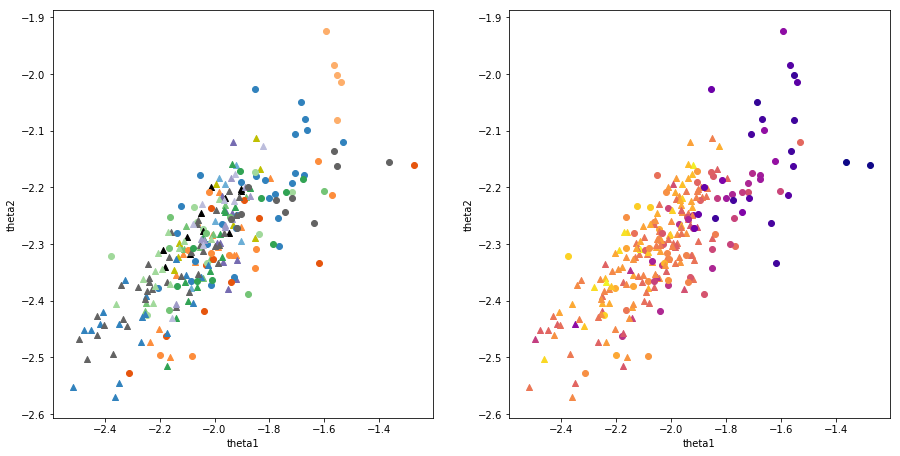

In [24]:
reload(helpers)
thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']
var1 = 0
var2 = 1

fig, axes = plt.subplots(1, 2, figsize=(15, 7.5))

x = helpers.get_indiv(trace[thetas[var1]], rat_idx)
y = helpers.get_indiv(trace[thetas[var2]], rat_idx)

for i, idx in enumerate(rat_idx):
    ## Formatting stuff
    data = subj_labels[i]
    dose = float(data[1])
 
    ## Plot with data
    x_ = np.mean(x[:,i])
    y_ = np.mean(y[:,i])
    
    ## Colour points by drug dose, marker style from photoperiod
    ms = period_ms[data[3]]
    label = data[0]+data[1]+data[3]
    c = helpers.get_colour(data[:4])

    axes[0].scatter(x_,y_,c=c, marker=ms, label=label)
    
    ## Get feeding data
    path = data_dir + '_'.join(data[0:4])
    filename = '_'.join(data)
    #print path
    #print filename
    amt = helpers.rate_from_file(path, filename)

    ## Formatting stuff
    c = amt_col.to_rgba(amt)
    ms = period_ms[data[3]]
    label = data[0]+data[1]+data[3]

    ## Plot with data
    x_ = np.mean(x[:,i])
    y_ = np.mean(y[:,i])

    axes[1].scatter(x_,y_,c=c, marker=ms, label=label)

#ax.legend()
axes[0].set_xlabel(thetas[var1])
axes[0].set_ylabel(thetas[var2])
axes[1].set_xlabel(thetas[var1])
axes[1].set_ylabel(thetas[var2])
plt.show()

# Figure 3b - PC1 of $\theta_{1}$, $\theta_{2}$ is a strong predictor of overall feeding, accounting for almost 30% of observed variation

(251, 2)
0.341269943424 2.3049320681e-24


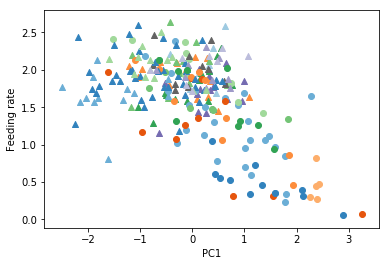

In [17]:
from sklearn import decomposition
from scipy import stats

data = []

for theta in thetas:
    data.append(np.mean(helpers.get_indiv(trace[theta], rat_idx), axis=0))

data = np.array(data)[:2].T

print data.shape

pca = decomposition.PCA(n_components=1, whiten=True)
pca.fit(data)

X = pca.transform(data)
amts = []

fig, ax = plt.subplots(1)
for i, idx in enumerate(rat_idx):
    ## Get feeding data
    data = subj_labels[i]
    #print data
    path = data_dir + '_'.join(data[0:4])
    filename = '_'.join(data)
    amt = helpers.rate_from_file(path, filename)
    amts.append(amt)

    ## Formatting stuff - label
    ms = period_ms[data[3]]
    label = data[0]+data[1]+data[3]
    
    ## Formatting stuff - dose colour
    c_dose = helpers.get_colour(data[:4])

    ## Now plot
    ax.scatter(X[i,0], amt, c=c_dose, marker=ms, label=dose)
    
slope, intercept, r_value, p_value, std_err = stats.linregress(X[:,0], np.array(amts))
print r_value**2, p_value
    
ax.set_xlabel('PC1')
ax.set_ylabel('Feeding rate')

#axes[0].legend()

plt.show()

# Figure 3b alternative - bout duration, feeding rate, and intermeal interval parameters strongly influence feeding, but bout termination and intrameal interval do not. Bout duration and feeding rate show substantial variation within groups, whereas intermeal interval variation is almost entirely between groups

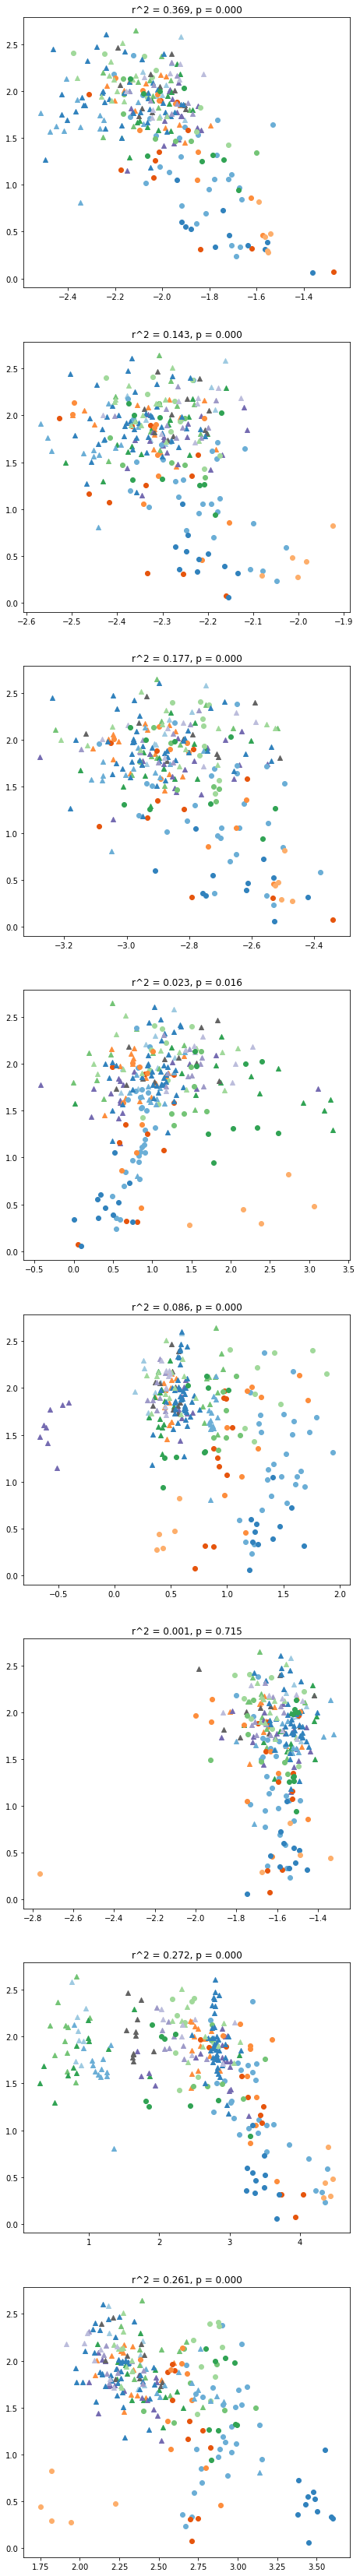

In [18]:
fig, axes = plt.subplots(8,1, figsize = (1*7.5, 8*7.5))

for var1 in range(0, 8):

    x = helpers.get_indiv(trace[thetas[var1]], rat_idx)
    xs = []
    ys = []
    for i, idx in enumerate(rat_idx):
        ## Formatting stuff
        data = subj_labels[i]
        dose = float(data[1])

        ## Plot with data
        x_ = np.mean(x[:,i])
        xs.append(x_)

        ## Get feeding data
        path = data_dir + '_'.join(data[0:4])
        filename = '_'.join(data)
        #print path
        #print filename
        y_ = helpers.rate_from_file(path, filename)
        ys.append(y_)

        ## Colour points by drug dose, marker style from photoperiod
        ms = period_ms[data[3]]
        label = data[0]+data[1]+data[3]
        c = helpers.get_colour(data[:4])

        axes[var1].scatter(x_,y_,c=c, marker=ms, label=label)

    slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
    title_text = "r^2 = %3.3f, p = %3.3f" %(r_value**2, p_value)
    axes[var1].set_title(title_text)
    
plt.show()

# Figure 3c - Isomap dimensionality reduction identifies behavioural classes that are modulated by anorectic drugs. High dose PYY appears to be its own behavioural class that overrules day/night variation, whereas leptin appears to push behaviour more towards typical 'satiated' feeding. This is not apparent in any low-dimensional projection. Medium dose PYY also appears to form its own behavioural class, in spite of different night/day feeding outcomes.

In [ ]:
import sys
import os
import theano
import theano.tensor as tt
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import PDMP_ll as ll
import cPickle as pickle
from IPython.display import display
#from IPython.html.widgets import *
from ipywidgets import widgets
from ipywidgets import interact
from sklearn import manifold
import numpy as np
from sklearn import preprocessing
reload(helpers)

thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']

data = []

for theta in thetas:
    data.append(np.mean(helpers.get_indiv(trace[theta], rat_idx), axis=0))

data = np.array(data).T

data = preprocessing.scale(data)

model = manifold.Isomap(10, n_components=2)
X = model.fit_transform(data)
fig, axes = plt.subplots(1,2, figsize=(15, 7.5))
for i, idx in enumerate(rat_idx):
    ## Formatting stuff
    subj_data = subj_labels[i]
    dose = float(subj_data[1])
    #print subj_data
    
    c = helpers.get_colour(subj_data[:4])
        
    axes[0].scatter(X[i,0], X[i,1], c=c, marker=ms)
        
    ## Get feeding data
    path = data_dir + '_'.join(subj_data[0:4])
    filename = '_'.join(subj_data)
    amt = helpers.rate_from_file(path, filename)

    c = amt_col.to_rgba(amt)
    dur = helpers.infer_duration(filename)
    
    ms = period_ms[subj_data[3]]

    
    axes[1].scatter(X[i,0], X[i,1], c=c, marker=ms)
    
plt.show()

In [ ]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

reload(helpers)
thetas = ['theta1', 'theta2', 'theta3', 'theta4', 'theta5', 'theta6', 'theta7', 'theta8']
var1 = 0
var2 = 6
var3 = 7

x = helpers.get_indiv(trace[thetas[var1]], rat_idx)
y = helpers.get_indiv(trace[thetas[var2]], rat_idx)
z = helpers.get_indiv(trace[thetas[var3]], rat_idx)

for i, idx in enumerate(rat_idx):
    ## Formatting stuff
    data = subj_labels[i]
    dose = float(data[1])
 
    ## Plot with data
    x_ = np.mean(x[:,i])
    y_ = np.mean(y[:,i])
    z_ = np.mean(z[:,i])
    
    ## Colour points by drug dose, marker style from photoperiod
    ms = period_ms[data[3]]
    label = data[0]+data[1]+data[3]
    c = helpers.get_colour(data[:4])

    ax.scatter(x_,y_,z_,c=c, marker=ms, label=label)

plt.show()

In [ ]:
%matplotlib inline